SciPy
=====

## Što je SciPy?

SciPy je nadgradnja NumPy paketa, i sadrži veliki broj numeričkih algoritama za cijeli niz područja. Ovdje su pobrojana neka nama zanimljivija:

* Specijalne funkcije ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integracija ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimizacija ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolacija ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourierova transformacija ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Linearna algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Linearna algebra s rijetkim matricama ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistika ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesiranje slika ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))

Za zadnja dva područja postoje i napredniji paketi. Za slike smo već npr. koristili *scikit-image*), a za statistiku ćemo korititi *pandas* paket.

SciPy paket učitavamo pomoću `scipy` modula.

In [2]:
from scipy import *

Narvno, možemo učitati i samo podpaket koji nas zanima, u ovom slučaju za linearnu algebru. 

In [3]:
import scipy.linalg as la

## Specijalne funkcije

Kao primjer pogledajmo Besselove funkcije:

In [4]:
# jn, yn: Besselove funkcije prvog i drugog reda s realnim stupnjem
# jn_zeros, yn_zeros: računaju pripadne nultočke
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [15]:
n = 0    # stupanj
x = 0.0

print ("J_{}({}) = {:f}".format(n, x, jn(n, x)))

x = 1.0
print ("Y_{}({}) = {:f}".format(n, x, yn(n, x)))

J_0(0.0) = 1.000000
Y_0(1.0) = 0.088257


In [16]:
from pylab import *
%matplotlib inline

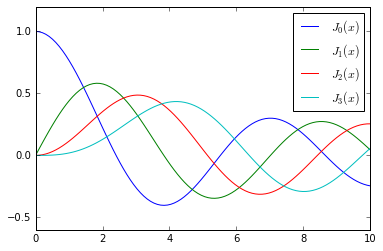

In [17]:
x = linspace(0, 10, 100)

fig, ax = subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [18]:
n = 0 # stupanj
m = 4 # broj nultočaka za izračunati
jn_zeros(n, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

## Numerička integracija

In [19]:
from scipy.integrate import quad, dblquad, tplquad

`quad` funkcija se koriste za numeričku integracije (quad ... jer se na engleskom taj proces zove kvadratura). `dblquad` služi za dvostruke, a `tplquad` za  trostruke integrale.

Jednostavan primjer, računamo 
$$\begin{equation*} \int_0^1 x\, \mathrm{d}x \end{equation*}$$

In [20]:
def f(x):
    return x

In [25]:
x_donje = 0
x_gornje = 1

rez, abserr = quad(f, x_donje, x_gornje)

print ("Rezultat = {}, apsolutna greška = {}".format(rez,abserr))

Rezultat = 0.5, apsolutna greška = 5.551115123125783e-15


Ove funkcije imaju puno opcionalnih argumenata. Ako želimo funkciji koju integriramo proslijediti dodatne parametre (vidi [ovdje](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)), možemo korisiti varijablu `args`.

In [26]:
def integrand(x, n):
    """
    Besselova funkcija prvog tipa stupnja n. 
    """
    return jn(n, x)


x_d = 0
x_g = 10

rez, abserr = quad(integrand, x_d, x_g, args=(3,))

print (rez, abserr)

0.7366751370811073 9.389126882496403e-13


Korištenje anonimnih funkcija:

In [27]:
rez, abserr = quad(lambda x: exp(-x ** 2), -Inf, Inf)

print ("numerički  = {}, {}".format(rez, abserr))

egzaktno = sqrt(pi)
print ("egzaktno = {}".format(egzaktno))

numerički  = 1.7724538509055159, 1.4202636780944923e-08
egzaktno = 1.7724538509055159


U više dimenzija:

\begin{equation*}
\int_a^b \int_{g(x)}^{h(x)} f(x,y)\,\mathrm{d}y\mathrm{d}x
\end{equation*}

In [28]:
def integrand(x, y):
    return exp(-x**2-y**2)

x_d = 0  
x_g = 10
y_d = 0
y_g = 10
# ovdje je a = x_d, b = x_g, g(x) = y_d, h(x) = y_g
# g(x) i h(x) trebaju biti funkcije!
rez, abserr = dblquad(integrand, x_d, x_g, lambda x : y_d, lambda x: y_g)

print (rez, abserr)

0.7853981633974476 1.638229942140971e-13


### Obične diferencijalne jednadžbe (ODJ)

SciPy nudi dvije mogućnosti rješavanja ODJ: Funkciju `odeint` i klasu `ode`. Mi ćemo prikazati `odeint`.

In [29]:
from scipy.integrate import odeint, ode

Sustav ODJ zapisujemo kao:

$y' = f(y, t)$

gdje je 

$y = [y_1(t), y_2(t), ..., y_n(t)]$, 

Još trebamo i početne uvjete $y(0)$.

Ovo je sintaksa:

    y_t = odeint(f, y_0, t)

+ `t` je niz vremena za koje želimo riješiti ODJ 
+ `y_t` je niz s jednim retkom za svaki trenutak iz `t`, a stupci daje rješenje `y_i(t)` u tom trenutku

#### Dvostruko njihalo

Opis problema: [http://en.wikipedia.org/wiki/Double_pendulum](http://en.wikipedia.org/wiki/Double_pendulum)

In [30]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

Ovo su jednadže s wiki stranice:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

Definiramo:

$x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

In [31]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    Desna strana ODJ
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [32]:
# početni uvjet
x0 = [pi/4, pi/2, 0, 0]

In [33]:
# niz vremena
t = linspace(0, 10, 250)

In [34]:
# rješenje ODJ
x = odeint(dx, x0, t)

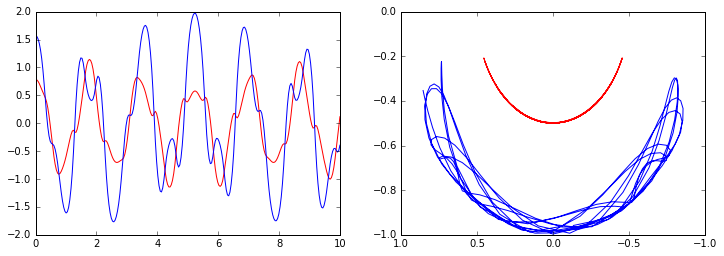

In [35]:
# nacrtajmo rješenje
# crtamo kuteve
fig, axes = subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")
x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])
x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
axes[1].plot(x1, y1, 'r', label="njihalo1")
axes[1].plot(x2, y2, 'b', label="njihalo2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

Jednostavna animacija, kasnije ćemo vidjeti kako možemo napravit bolju animaciju.

In [36]:
from IPython.display import display,clear_output
import time

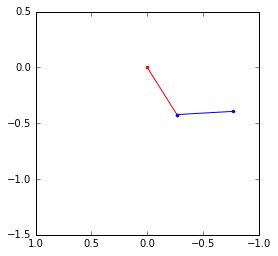

In [40]:
fig, ax = subplots(figsize=(4,4))
for t_idx, tt in enumerate(t[:200]):
    x1 = + L * sin(x[t_idx, 0])
    y1 = - L * cos(x[t_idx, 0])
    x2 = x1 + L * sin(x[t_idx, 1])
    y2 = y1 - L * cos(x[t_idx, 1])    
    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])
    display(fig)
    clear_output(wait=True)    
    time.sleep(0.03)

#### Prigušeni dinamički oscilator

Opis problema možete pročitati ovdje: [http://en.wikipedia.org/wiki/Damping](http://en.wikipedia.org/wiki/Damping)

Jednadžba je

\begin{equation} \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0 \end{equation}

+ $x$ pozicija oscilatora, 
+ $\omega_0$ frekvencija,
+ $\zeta$ koeficijent gušenja.

Definiramo $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

\begin{equation} \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x \end{equation}

\begin{equation} \frac{\mathrm{d}x}{\mathrm{d}t} = p \end{equation}

In [38]:
def dy(y, t, zeta, w0):
    """
    Desna strana ODJ za harmonički oscilator
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [41]:
# početno stanje: 
y0 = [1.0, 0.0]

In [42]:
# vremena, frekvencija
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [43]:
# rješavamo ODJ za tri vrste prigušenja

y1 = odeint(dy, y0, t, args=(0.0, w0)) # negušeno
y2 = odeint(dy, y0, t, args=(0.2, w0)) # podgušeno
y3 = odeint(dy, y0, t, args=(1.0, w0)) # kritičko gušenje
y4 = odeint(dy, y0, t, args=(5.0, w0)) # pregušeno

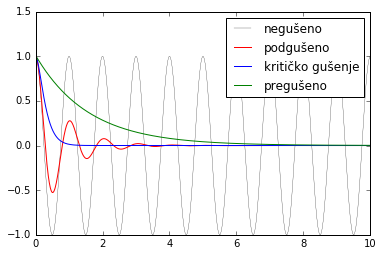

In [44]:
fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label=u"negušeno", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label=u"podgušeno")
ax.plot(t, y3[:,0], 'b', label=u"kritičko gušenje")
ax.plot(t, y4[:,0], 'g', label=u"pregušeno")
ax.legend();

## Fourierova transformacija

Paket je `fftpack`:

In [45]:
from scipy.fftpack import *

Primjenimo Fourierovu transformaciju na prethodni primjer harmoničkog oscilatora.

In [46]:
N = len(t)
dt = t[1]-t[0]

# y2 je rješenje podgušenog harmoničkog oscilatora
F = fft(y2[:,0]) 

# izračunajmo frekvencije
w = fftfreq(N, dt)

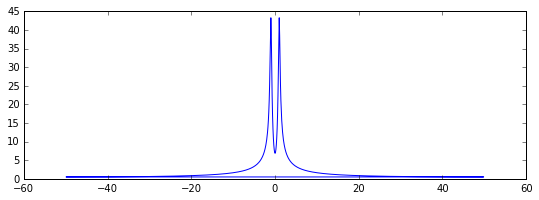

In [47]:
fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

Kako je signal realan, spektar je simetričan. Stoga nam je dosta nacrtati pozitivne frekvencije.

In [48]:
indeksi = where(w > 0)
w_pos = w[indeksi]
F_pos = F[indeksi]

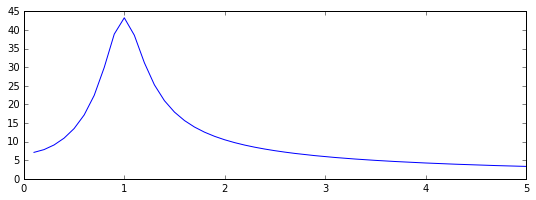

In [49]:
fig, ax = subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

## Linearna algebra

Detaljna dokumentacija: [http://docs.scipy.org/doc/scipy/reference/linalg.html](http://docs.scipy.org/doc/scipy/reference/linalg.html)

Nećemo prolaziti kroz sve funkcije.

#### Sustavi linearnih jednadžbi

$A x = b$

In [51]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [52]:
x = solve(A, b)
x

array([-0.47619048,  0.95238095, -0.14285714])

In [53]:
# provjera
dot(A, x) - b

array([ -1.11022302e-16,  -4.44089210e-16,  -8.88178420e-16])

$A X = B$

In [54]:
A = rand(3,3)
B = rand(3,3)

In [55]:
X = solve(A, B)
X

array([[ 0.20671665,  0.4874247 ,  0.96190533],
       [ 1.02207492,  0.53696297, -1.02909029],
       [ 2.29214168,  0.71326243,  3.77817477]])

In [56]:
# provjera
norm(dot(A, X) - B)

1.3877787807814457e-16

#### Svojstveni problem

\begin{equation}\displaystyle A v = \lambda v\end{equation}

In [57]:
evals = eigvals(A)
evals

array([ 0.85040953, -0.42988209,  0.1565948 ])

In [58]:
evals, evecs = eig(A)

In [59]:
evals

array([ 0.85040953, -0.42988209,  0.1565948 ])

In [60]:
evecs

array([[-0.39812839, -0.50497757,  0.14566696],
       [-0.69668831,  0.29888434, -0.37503724],
       [-0.59675723,  0.80973194,  0.91549342]])

Svojstveni vektori su stupci u `evecs`:

In [61]:
n = 1

norm(dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

2.6184557666721351e-16

To nije sve, postoje i specijalizirane funkcije, kao npr. `eigh` za hermitske matrice

#### Matrične operacije

In [62]:
# inverz
inv(A)

array([[-0.53112685,  0.02425965,  1.11052871],
       [ 0.20538566,  2.46304387, -1.63970387],
       [ 5.93977767, -5.21690593,  3.30367593]])

In [63]:
# determinanta
det(A)

-0.057247272955063801

In [64]:
# razne norme
norm(A, ord=2), norm(A, ord=Inf)

(1.1665461572347318, 1.1244122263676095)

## Rijetke matrice

Više informacija na [http://en.wikipedia.org/wiki/Sparse_matrix](http://en.wikipedia.org/wiki/Sparse_matrix)

Postoji više formata rijetkih matrica, mi nećemo ulaziti u detalje.

In [65]:
from scipy.sparse import *

In [66]:
# gusta matrica
M = array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [67]:
# pretvorimo je u rijetku matricu
A = csr_matrix(M); A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [68]:
# vratimo natrag
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int64)

Pametniji način kreiranja rijetke matrice.

In [72]:
A = lil_matrix((4,4)) # prazna 4x4 rijetka matrica
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [73]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [74]:
# konvertiranje
A = csr_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [75]:
A = csc_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [76]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [77]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [79]:
(A @ A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [81]:
# ovo ne radi
dot(A,A)
# iz dokumentacije:
# As of NumPy 1.7, np.dot is not aware of sparse matrices, therefore using it will result on unexpected results or errors.

ValueError: Cannot find a common data type.

In [82]:
v = array([1,2,3,4])[:,newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

Vektor `v` smo mogli konstruirati i drugačije (vidjeli smo primjere u predavanju o NumPy-ju), no uvijek trebamo doći do dvodimenzionalnog niza. Za razliku od MATLAB-a u kojemu su svi nizovi 2D, u NumPy-ju 1D niz nije isto što i matrica $n\times 1$ ili $1\times n$.
Npr. jedna mogućnost je
```
v = array([[1,2,3,4]]).T
```

In [83]:
# rijetka matrica puta vektor
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [84]:
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

## Optimizacija

Više na [http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html](http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html)

Modul je `optimize`:

In [85]:
from scipy import optimize

### Nalaženje minimuma

In [86]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

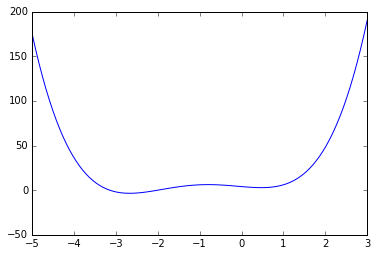

In [87]:
fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [88]:
x_min = optimize.fmin_bfgs(f, -2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 10


array([-2.67298167])

In [89]:
optimize.fmin_bfgs(f, 0.5)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

In [90]:
optimize.brent(f)

0.46961743402759754

In [91]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Nalaženje rješenja jednadžbi

Problem oblika $f(x) = 0$ se rješava `fsolve` funkcijom. 

In [92]:
omega_c = 3.0
def f(omega):
    return tan(2*pi*omega) - omega_c/omega

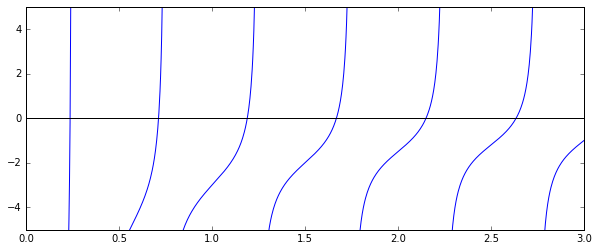

In [93]:
import numpy as np
np.seterr(divide='ignore')
fig, ax  = subplots(figsize=(10,4))
x = linspace(0, 3, 1000)
y = f(x)
maska = where(abs(y) > 50)
x[maska] = y[maska] = NaN # da se riješimo asimptote
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [94]:
optimize.fsolve(f, 0.1)

array([ 0.23743014])

In [95]:
optimize.fsolve(f, 0.6)

array([ 0.71286972])

In [96]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

## Interpolacija

Funkcija `interp1d`, za dane nizove $x$ i $y$ koordinata vraća objekt koji se ponaša kao funkcija.

In [97]:
from scipy.interpolate import *

In [99]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = sin(n) + 0.1 * randn(len(n)) # ubacujemo malo šuma
y_real = sin(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

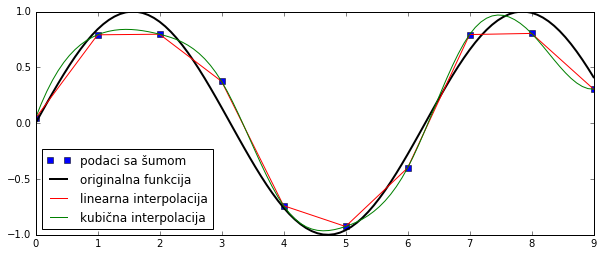

In [100]:
fig, ax = subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label=u'podaci sa šumom')
ax.plot(x, y_real, 'k', lw=2, label='originalna funkcija')
ax.plot(x, y_interp1, 'r', label='linearna interpolacija')
ax.plot(x, y_interp2, 'g', label=u'kubična interpolacija')
ax.legend(loc=3);

## Statistika

Više na [http://docs.scipy.org/doc/scipy/reference/stats.html](http://docs.scipy.org/doc/scipy/reference/stats.html).

Mi ćemo kasnije raditi s moćnijim paketom `pandas`.

In [101]:
from scipy import stats

In [102]:
# slučajna varijabla s Poissionovom distribucijom

X = stats.poisson(3.5)

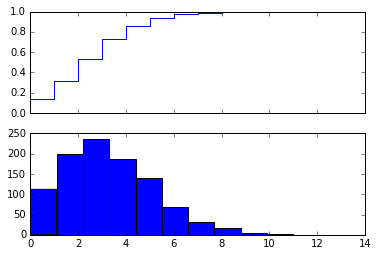

In [103]:
n = arange(0,15)

fig, axes = subplots(2,1, sharex=True)

# kumulativna distribucija (CDF)
axes[0].step(n, X.cdf(n))

#  histogram 1000 slučajnih realizacija od X
axes[1].hist(X.rvs(size=1000));

In [104]:
# normalna distribucija
Y = stats.norm()

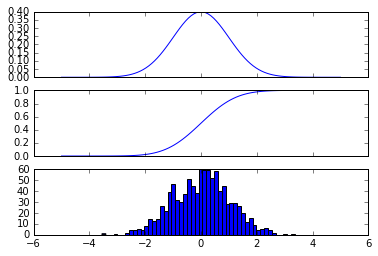

In [105]:
x = linspace(-5,5,100)
fig, axes = subplots(3,1, sharex=True)
# PDF
axes[0].plot(x, Y.pdf(x))
# CDF
axes[1].plot(x, Y.cdf(x));
# histogram
axes[2].hist(Y.rvs(size=1000), bins=50);

Osnovna statistika:

In [106]:
X.mean(), X.std(), X.var()

(3.5, 1.8708286933869707, 3.5)

In [107]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [108]:
from verzije import *
from IPython.display import HTML
HTML(print_sysinfo()+info_packages('numpy,scipy,matplotlib'))

Python verzija,3.5.1
kompajler,GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
sustav,Linux
broj CPU-a,8
interpreter,64bit
numpy verzija,1.10.4
scipy verzija,0.17.0
matplotlib verzija,1.5.1


# Zadaci za vježbu

- Konstruirajte $1000\times 1000$ matricu tipa `lil_matrix`, konvertirajte je u  `CSR` format i riješite $A x = b$ za neki $b$.
- Učitajte matricu [ODEP400A](http://math.nist.gov/MatrixMarket/data/NEP/mvmode/odep400a.html) te izračunajte 100 njenih svojstvenih vrijednosti.
- Zadana je funkcija $f(x,y)=\mathrm{exp}(-1/(0.1x^2 + y^2)$. Ta funkcija ima minimum u $(0,0)$. Krenuvši od početne točke $(1, 1)$, probajte doći $10^{-8}$ blizu minimuma koristeći funkcije za optimizaciju. 
- Riješite [Lotka-Volterrin sustav ODJ](http://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equation) za različite parametre $\alpha$, $\beta$, $\gamma$, $\delta$.


Slika [moonlanding.png](http://scipy-lectures.github.io/_images/moonlanding.png) je puna šuma. Zadaća je očistiti sliku koristeći Fourierovu transformaciju.

- Učitajte sliku s `pylab.imread()`.
- Nađite i iskoristite 2-D FFT funkciju iz `scipy.fftpack` i nacrtajte spektar slike.
- Spektar se sastoji od komponenti s viskom i niskom frekvencijom. Šum je smješten u dijelu spektra s visokom frekvencijom, pa probajte neke od tih komponenti staviti na nulu.
- Koristite inverznu Fourierovu transformaciju da pogledate da li ste napravili dobar posao.